# Data Reading

In [1]:
# List file data
import glob

path = 'data'

files = [f[5:] for f in glob.glob(path + "/*.xlsx", recursive=True)]

for f in files:
    print(f)


C2011-05 Telecom System Agnes.xlsx
C2011-07 Patient Transport System.xlsx
C2015-10 Tax Return System (1).xlsx
C2015-11 Staff Authorization System.xlsx
C2015-12 Premium Payment System.xlsx
C2015-13 Broker Account Conversion System.xlsx
C2015-14 Supplementary Pensions Database.xlsx
C2015-15 FACTA System.xlsx
C2015-16 Generic Document Output System.xlsx
C2015-17 Insurance Bundling System.xlsx
C2015-18 Tax Return System (2).xlsx
C2015-19 Receipt Numbering System.xlsx
C2015-20 Policy Numbering System.xlsx
C2015-21 Investment Product (1).xlsx
C2015-22 Risk Profile Questionnaire.xlsx
C2015-23 Investment Product (2).xlsx
C2015-24 CRM System.xlsx
C2015-25 Beer Tasting.xlsx
C2015-26 Debt Collection System.xlsx
C2015-28 Website Tennis Vlaanderen.xlsx
C2016-08 SCM System.xlsx
C2016-09 Data Loss Prevention System.xlsx


In [2]:
import pandas 

dfs = [pandas.read_excel('data/'+file, sheet_name=None, skiprows=1) for file in files]
sheetnames = [list(df.keys()) for df in dfs]


In [3]:
def parse_date(date):
    elms = date.split()
    total_hour = 0
    for elm in elms:
        if elm.endswith("d"):
            total_hour += int(elm[:-1])*24
        elif elm.endswith("h"):
            total_hour += int(elm[:-1])
    return total_hour

def find_column_indices(header, col_names):
    indices = []
    for name in col_names:
        for i, h in enumerate(header):
            if h == name:
                indices.append(i)
    return indices

In [4]:
import numpy as np

baselines = [dfs[i]['Baseline Schedule'][['ID', 'Duration', 'Total Cost']].values for i in range(0, np.size(files))]


In [5]:
# project id
id = 0

# planned duration
PD = [parse_date(baselines[i][0][1]) for i in range(0, np.size(files))]

# planned budget
BAC = [baselines[i][0][2] for i in range(0, np.size(files))]

print("PD:", PD)
print("BAC: ", BAC)


PD: [1032, 9336, 2040, 1320, 4416, 2808, 2977, 1368, 6480, 4996, 3072, 4351, 4104, 888, 3626, 2908, 5592, 317, 3556, 4824, 17400, 4680]
BAC:  [180485.270056152, 180759.44, 18990, 14400, 132570, 12735, 34260, 11700, 64620, 281430, 39450, 43800, 12645, 4020, 29880, 46920, 44130, 1210, 458112.368399999, 219275, 375253.343053818, 584951.768859863]


In [6]:
# tracking periods
tracking_periods = [[x for x in sheetnames[i] if "TP" in x] for i in range(0, np.size(files))]
n_tracking_periods = [len(tracking_periods[i]) for i in range(0, np.size(files))]
print("Number of tracking periods:", n_tracking_periods)


Number of tracking periods: [5, 23, 3, 3, 3, 4, 4, 3, 6, 5, 3, 4, 4, 2, 4, 4, 6, 3, 5, 4, 34, 9]


In [9]:
import plotly.graph_objects as go

# Ve bang
fig = go.Figure(
    layout = dict(height=1500),
    data=[go.Table(
        columnwidth = [100,500,200],
        header=dict(values=['ID', 'Project Name', 'BAC', 'Duration(months)', 'Number of Tracking'],
                line_color='black',
                fill_color='white',
                align='center'),
        cells=dict(values=[list(range(0, np.size(files))), files,
                           [float(int(bac*10000))/10000 for bac in BAC],
                           [float(int(d/24/30*10000))/10000 for d in PD],
                           n_tracking_periods],
                line_color='black',
                fill_color='white',
                align='center'
            )
    )]
)

fig.show()


In [42]:
import numpy as np

# Col 0 = ID, col 12 = Duration
beta = 0.15

ATs = []
EVs = []
PVs = []
ACs = []
DAC = []
CAC = []

for i in range(0, np.size(files)):
    ATx = []
    EVx = []
    PVx = []
    ACx = []

    print ("Project: ", i)
    for period in tracking_periods[i]:
        cols = find_column_indices(dfs[i][period].values[1], ["ID", "Actual Duration", "Actual Cost", "Earned Value (EV)", "Planned Value (PV)"])
        data_period = dfs[i][period].values[2:, cols]

#        assert (baselines[:,0] == data_period[:,0]).sum() == len(baselines), "Wrong permutation!"

        AT = parse_date(data_period[id][1])
        AC = data_period[id][2]
        EV = data_period[id][3]
        PV = data_period[id][4]

        print("   ", period, " AT=", AT, " AC=", AC, " EV=", EV, " PV=", PV)

        ATx.append(AT)
        ACx.append(AC)
        PVx.append(PV)
        EVx.append(EV)

    print()

    DACx = ATx[n_tracking_periods[i]-1]
    CACx = ACx[n_tracking_periods[i]-1]

    print("   Actual duration: ", DAC, " Cost at complete: ", CAC)

    ATs.append(ATx)
    EVs.append(EVx)
    PVs.append(PVx)
    ACs.append(ACx)
    DAC.append(DACx)
    CAC.append(CACx)
    

Project:  0
    Project Control - TP1  AT= 120  AC= 13526.6396484375  EV= 13526.6396484375  PV= 13526.6396484375
    TP2  AT= 576  AC= 115357.889733887  EV= 115357.890010262  PV= 115357.889733887
    TP3  AT= 696  AC= 129405.889733887  EV= 129405.889812851  PV= 143433.170007324
    TP4  AT= 960  AC= 166619.970007324  EV= 166619.970016861  PV= 176069.270056152
    TP5  AT= 1272  AC= 180485.270056152  EV= 180485.270056152  PV= 180485.270056152

   Actual duration:  []  Cost at complete:  []
Project:  1
    Project Control - TP1  AT= 480  AC= 5262.4  EV= 5262.4  PV= 5262.4
    TP2  AT= 960  AC= 5262.4  EV= 5262.4  PV= 5262.4
    TP3  AT= 1440  AC= 10155.84  EV= 9434.4  PV= 9434.4
    TP4  AT= 1920  AC= 11657.28  EV= 10935.84  PV= 10935.84
    TP5  AT= 2400  AC= 17592.96  EV= 16871.52  PV= 16871.52
    TP6  AT= 2880  AC= 18593.92  EV= 17622.24  PV= 38350.84
    TP7  AT= 3360  AC= 23426.56  EV= 22454.88  PV= 43183.48
    TP8  AT= 3840  AC= 23927.04  EV= 22705.12  PV= 43433.72
    TP9  AT= 4

In [61]:
ATNs = []
PVNs = []
ACNs = []
EVNs = []

for i in range(0, np.size(files)):
    ATNx = []
    ACNx = []
    PVNx = []
    EVNx = []

    print ("Project: ", i)
    for j in range(0, n_tracking_periods[i]):
        ATN = ATs[i][j]/PD[i]
        ACN = ACs[i][j]/BAC[i]
        PVN = PVs[i][j]/BAC[i]
        EVN = EVs[i][j]/BAC[i]

        print("   ", tracking_periods[i][j], " ATN=", ATN, " ACN=", ACN, " PVN=", PVN, " EVN=", EVN)

        ATNx.append(ATN)
        ACNx.append(ACN)
        PVNx.append(PVN)
        EVNx.append(EVN)
    
    ATNs.append(ATNx)
    ACNs.append(ACNx)
    PVNs.append(PVNx)
    EVNs.append(EVNx)


Project:  0
    Project Control - TP1  ATN= 0.11627906976744186  ACN= 0.07494594791158933  PVN= 0.07494594791158933  EVN= 0.07494594791158933
    TP2  ATN= 0.5581395348837209  ACN= 0.6391540412023499  PVN= 0.6391540412023499  EVN= 0.6391540427336382
    TP3  ATN= 0.6744186046511628  ACN= 0.7169886478471438  PVN= 0.7947084543946413  EVN= 0.7169886482846531
    TP4  ATN= 0.9302325581395349  ACN= 0.9231776640580461  PVN= 0.9755326293462835  EVN= 0.923177664110887
    TP5  ATN= 1.2325581395348837  ACN= 1.0  PVN= 1.0  EVN= 1.0
Project:  1
    Project Control - TP1  ATN= 0.05141388174807198  ACN= 0.029112725730949373  PVN= 0.029112725730949373  EVN= 0.029112725730949373
    TP2  ATN= 0.10282776349614396  ACN= 0.029112725730949373  PVN= 0.029112725730949373  EVN= 0.029112725730949373
    TP3  ATN= 0.15424164524421594  ACN= 0.056184285589731854  PVN= 0.05219312474081575  EVN= 0.05219312474081575
    TP4  ATN= 0.20565552699228792  ACN= 0.06449057377031042  PVN= 0.06049941292139431  EVN= 0.06049

# Cost forecasting

In [44]:
### Calc ggm

# Ham gompertz
#from scipy.stats import gompertz

def gompertz(t, alpha, beta, gamma):
    return alpha*np.exp(-np.exp(beta-t*gamma))

def gompertz_dis(t, alpha, beta, gamma):
    return alpha*gamma*np.exp(beta-t*gamma)*gompertz(t, alpha, beta, gamma)

def gompertz_r(params, x, y):
    ret = []
    for i in range(0, np.size(x)):
        ret.append(gompertz(x[i], params[0], params[1], params[2]) - y[i])
    return ret

from scipy.optimize import least_squares

# Regression
alphas = []
betas  = []
gammas = []

for i in range(0, np.size(files)):
    print ("Project: ", i)

    alphax = []
    betax  = []
    gammax = []
    for j in range(0, n_tracking_periods[i]):
        # Response
        RP = [ACNs[i][t] if t <= j else PVNs[i][t] for t in range(0, n_tracking_periods[i])]

        # standard least_square
        x0 = np.ones(3)
        lsq = least_squares(gompertz_r, x0, args=(ATNs[i], RP))

        # robust least squares
        #x1 = np.ones(3)
        #res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

        ## Tham so dau vao [narbaev2014]
        alpha = lsq.x[0]
        beta  = lsq.x[1]
        gamma = lsq.x[2]

        alphax.append(alpha)
        betax.append(beta)
        gammax.append(gamma)

    alphas.append(alphax)
    betas.append(betax)
    gammas.append(gammax)


Project:  0
Project:  1
Project:  2
Project:  3
Project:  4
Project:  5
Project:  6
Project:  7
Project:  8
Project:  9
Project:  10
Project:  11
Project:  12
Project:  13
Project:  14
Project:  15
Project:  16
Project:  17
Project:  18
Project:  19
Project:  20
Project:  21


In [45]:
import matplotlib.pyplot as plt

'''
for i in range(0, np.size(files)):
    # Ve hinh regression
    plt.title(f'Project {i}')

    # Biểu diễn sự phân bố tập dữ liệu input
    # c: color
    plt.scatter(ATNs[i], RPs[i], c='b')
 
    # Đường thẳng hồi quy
    plt.plot(ATNs[i], [gompertz(t, alpha[i], beta[i], gamma[i]) for t in ATNs[i]])
    plt.show()
'''


"\nfor i in range(0, np.size(files)):\n    # Ve hinh regression\n    plt.title(f'Project {i}')\n\n    # Biểu diễn sự phân bố tập dữ liệu input\n    # c: color\n    plt.scatter(ATNs[i], RPs[i], c='b')\n \n    # Đường thẳng hồi quy\n    plt.plot(ATNs[i], [gompertz(t, alpha[i], beta[i], gamma[i]) for t in ATNs[i]])\n    plt.show()\n"

In [46]:
print("Project actual cost: ", CAC)

# Calc SPI
SPI = [[EVs[i][t]/PVs[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
CPI = [[EVs[i][t]/ACs[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
CR  = [[CPI[i][t]*SPI[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
CI  = [[0.8*CPI[i][t]+0.2*SPI[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]

print ('SPI=', SPI)
print ('CPI=', CPI)
print ('CR=', CR)
print ('CI=', CI)


Project actual cost:  [180485.270056152, 191065.059996338, 8010, 9105, 58410, 9990, 18285, 7035, 64125, 281070, 25380, 37530, 11100, 3240, 17400, 32805, 36870, 1780, 512546.14605017, 382475, 438741.660275459, 1425155.96141052]
SPI= [[1.0, 1.0000000023958049, 0.902203373224222, 0.9463319179077792, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.4595007566978977, 0.5199877360509157, 0.5227532893797722, 0.5227532893797722, 0.5361164348061941, 0.5473166338890167, 0.6000192485999651, 0.2775814457009784, 0.9701030735436496, 0.9313304073485115, 0.714377307277204, 0.7242840430183478, 0.9905914952463836, 1.0, 0.9436247423647693, 0.9436247423647693, 0.9529310336433882, 1.0], [0.7431316696027853, 1.0683660897822629, 1.0], [0.576402879447388, 0.9970786531319775, 1.0], [0.4273645696674072, 0.8893921400178383, 1.0], [0.3981308515453458, 0.6508998302505659, 0.9222066264827636, 1.0], [0.2778877873625302, 0.6397887261610633, 0.8300562685100845, 1.0021939447125932], [0.6895652219005246, 0.9777142865317238, 1.09859154

In [47]:
# Calc CEAC
CEAC_EVM1 = [[ACs[i][t] + BAC[i] - EVs[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('CEAC_EVM1=', CEAC_EVM1)

# Calc CEAC
CEAC_EVM2 = [[BAC[i]/CPI[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('CEAC_EVM2=', CEAC_EVM2)

# Calc CEAC
CEAC_EVM3 = [[BAC[i]/CPI[i][t]/SPI[i][t] for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('CEAC_EVM3=', CEAC_EVM3)


CEAC_EVM1= [[180485.270056152, 180485.269779777, 180485.269977188, 180485.270046615, 180485.270056152], [180759.44, 180759.44, 181480.88, 181480.88, 181480.88, 181731.12, 181731.12, 181981.36000000002, 181981.36000000002, 181981.36, 181981.36000000002, 181981.36, 181981.36000000002, 186515.11999999997, 186515.11999999997, 187775.91992485, 188604.53712368, 188783.28, 188783.28, 188783.28, 188783.28, 190181.22, 191065.05999633804], [17207.70001262426, 12759.4736284018, 8010], [12350.999981760979, 9023.9999806881, 9105], [118519.2001155764, 88446.2996828556, 58410], [12641.99996653944, 11544.29999973625, 10679.8500725627, 9990], [33597.0000064373, 33684.00005310774, 26849.8501628637, 18285], [10541.999968886379, 6818.9999914169, 7035], [65522.99999836832, 65764.50003387406, 61951.5000803489, 64338.000522404895, 65845.19998312, 64125], [282225.00001659617, 281387.9994727112, 280468.660155796, 287855.500423014, 281070], [38588.85007023811, 35745.5999913812, 25380], [43519.50001850724, 42502

In [48]:
# Calc CEAC
CEAC_GGM1 = [[ACs[i][t] + (gompertz(1.0, alphas[i][t], betas[i][t], gammas[i][t])
                           -gompertz(ATNs[i][t], alphas[i][t], betas[i][t], gammas[i][t]))*BAC[i]
              for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('CEAC_GGM1=', CEAC_GGM1)

# Calc CEAC
CEAC_GGM2 = [[ACs[i][t] + (gompertz(1.0/SPI[i][t], alphas[i][t], betas[i][t], gammas[i][t])
                           -gompertz(ATNs[i][t], alphas[i][t], betas[i][t], gammas[i][t]))*BAC[i]
              for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('CEAC_GGM2=', CEAC_GGM2)


CEAC_GGM1= [[177440.69257292064, 172025.02370761297, 166836.5103362294, 171731.2752196154, 169871.898589634], [178404.32924273697, 177497.6341601269, 180618.46673338083, 179102.53416341732, 180421.32775197944, 180127.12848169665, 183566.4641461207, 182545.89513524983, 180742.08509923075, 178541.98221780793, 170288.17075974235, 154219.18176030036, 156548.72771610954, 197632.86890583998, 164584.8339967811, 161368.3510332028, 155505.3709258256, 188706.53276955974, 181609.79292287127, 175512.30213630645, 171388.2934257086, 171427.4415768846, 178411.1192548616], [18989.99993650483, 18990.000000135406, 8010.0], [14408.85912276352, 14691.61175868538, 9126.02260955128], [132570.01020437357, 132609.36634409675, 58410.011863502616], [12355.169653913772, 12658.14632889815, 12455.552410016298, 10006.2361009144], [34840.93321208832, 34244.4378230102, 34705.41630551778, 18320.304297844294], [10650.000000000038, 10304.982016193204, 7035.0], [68951.80490654083, 66401.94350304356, 65122.124973084465, 6

In [49]:
# Calc PE
PE_EVM1 = [[(CEAC_EVM1[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('PE_EVM1=', PE_EVM1)

# Calc PE
PE_EVM2 = [[(CEAC_EVM2[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('PE_EVM2=', PE_EVM2)

# Calc PE
PE_EVM3 = [[(CEAC_EVM3[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('PE_EVM3=', PE_EVM3)


PE_EVM1= [[0.0, -1.5312882862407382e-07, -4.37509326393753e-08, -5.2840744243222956e-09, 0.0], [-5.393775291272787, -5.393775291272787, -5.016186631151554, -5.016186631151554, -5.016186631151554, -4.885215536800349, -4.885215536800349, -4.754244442449129, -4.754244442449129, -4.754244442449144, -4.754244442449129, -4.754244442449144, -4.754244442449129, -2.381356380086054, -2.381356380086054, -1.7214764811269287, -1.2877932117495312, -1.194242420033125, -1.194242420033125, -1.194242420033125, -1.194242420033125, -0.46258588375862486, 1.523241897670433e-14], [114.82771551341149, 59.29430247692634, 0.0], [35.65074115058736, -0.8896212994167979, 0.0], [102.90909110696182, 51.42321465991372, 0.0], [26.546546211606014, 15.558558555918415, 6.90540613175876, 0.0], [83.7407711590774, 84.21657125024741, 46.84085404902214, 0.0], [49.85074582638776, -3.0703625953532305, 0.0], [2.1801169565198015, 2.5567251990238824, -3.3894735589100944, 0.33216455735656075, 2.682573073091608, 0.0], [0.41092966755

In [50]:
# Calc PE
PE_GGM1 = [[(CEAC_GGM1[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('PE_GGM1=', PE_GGM1)

# Calc PE
PE_GGM2 = [[(CEAC_GGM2[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]
print ('PE_GGM1=', PE_GGM2)


PE_GGM1= [[-1.6868841885457624, -4.68749962027754, -7.562256862111921, -4.850254446699761, -5.880464075110398], [-6.626397706542312, -7.1009455294814945, -5.467558151740249, -6.260969867096559, -5.57073713245246, -5.724715714558693, -3.9246295740105603, -4.458776953385126, -5.402858532745395, -6.55435262667601, -10.874248403655734, -19.28446689140539, -18.065224631280056, 3.4374725078608552, -13.859271810379377, -15.542720874085703, -18.611298722641358, -1.2344105336807658, -4.948715936680393, -8.14003243729107, -10.29846407867903, -10.277974643731195, -6.622843936886695], [137.07865089269453, 137.07865168708372, 0.0], [58.25215950316881, 61.35762502674772, 0.23089082428644445], [126.96457833311688, 127.0319574458085, 2.0310738941272213e-05], [23.675371911048767, 26.70817146044195, 24.680204304467452, 0.16252353267668262], [90.54379662066349, 87.28158503150233, 89.80265958719048, 0.1930779209422675], [51.38592750533103, 46.481620699263736, 0.0], [7.527181140804408, 3.550789088566949, 1

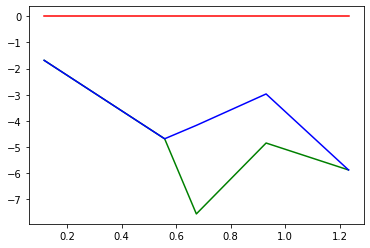

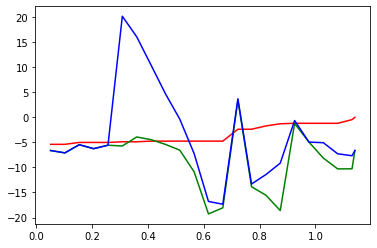

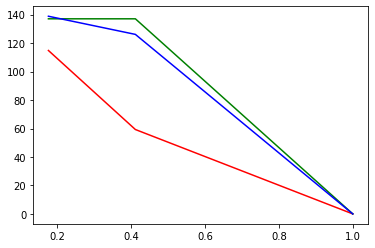

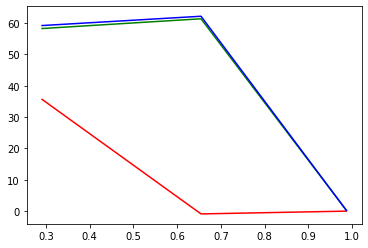

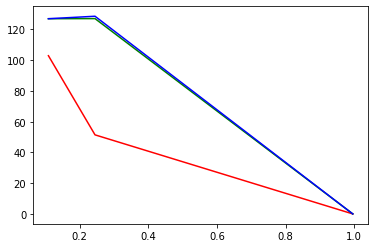

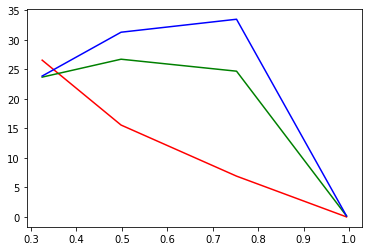

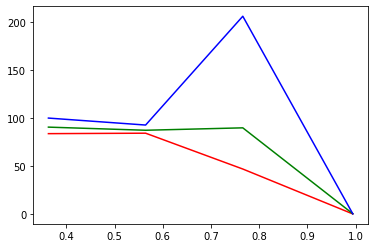

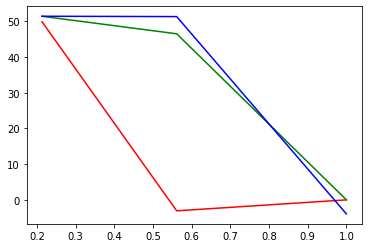

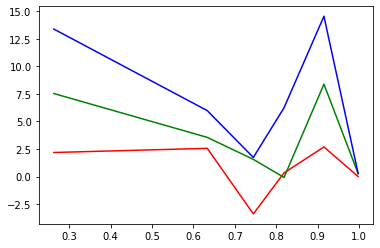

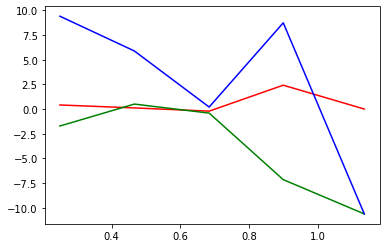

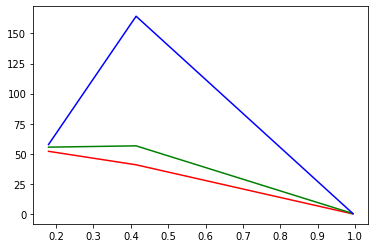

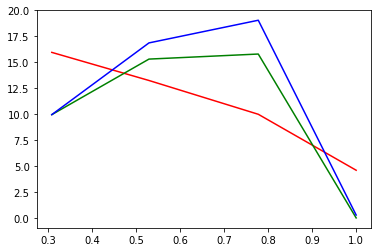

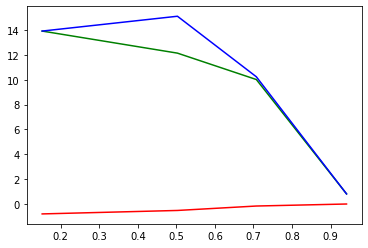

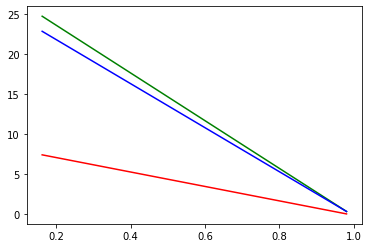

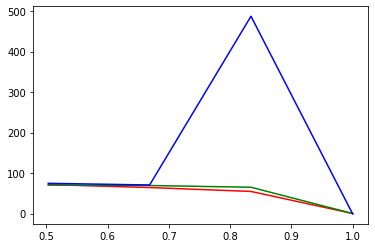

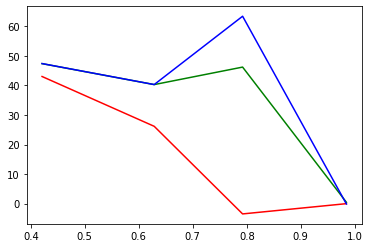

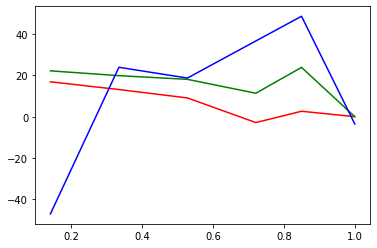

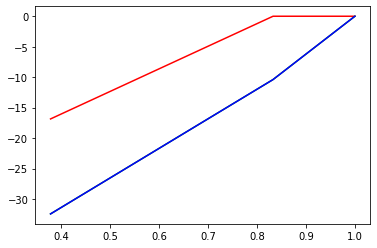

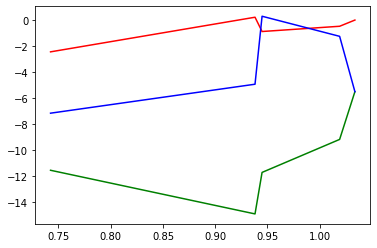

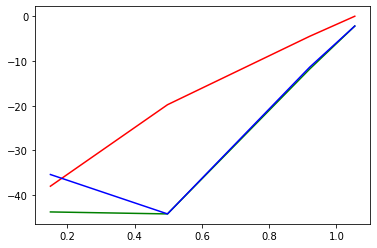

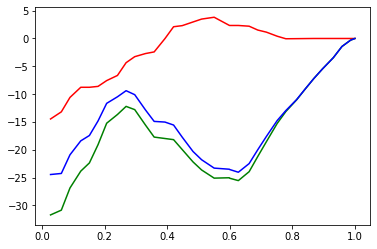

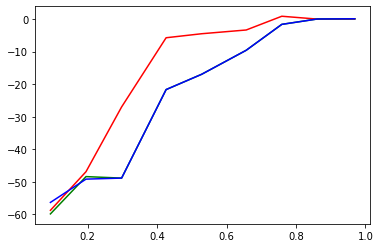

In [51]:
for i in range(0, np.size(files)):
    plt.plot(ATNs[i], PE_EVM1[i], 'r-', ATNs[i], PE_GGM1[i], 'g-', ATNs[i], PE_GGM2[i], 'b-', )
    plt.show()


In [52]:
# Ve bang
'''
fig = go.Figure(
    layout = dict(height=1000),
    data=[go.Table(
        columnwidth = [200,400],
        header=dict(values=['Project', 'EVM based', 'GGM based', 'ES GGM based', 'CPI', 'CR', 'CI'],
                line_color='black',
                fill_color='white',
                align='center'),
        cells=dict(values=[list(range(0, np.size(files))),
                           [float(int(pe*10000))/10000 for pe in PE1],
                           [float(int(pe*10000))/10000 for pe in PE2],
                           [float(int(pe*10000))/10000 for pe in PE3],
                           [float(int(cp*10000))/10000 for cp in CPI],
                           [float(int(cr*10000))/10000 for cr in CR],
                           [float(int(ci*10000))/10000 for ci in CI]],
                line_color='black',
                fill_color='white',
                align=['center', 'right']))
    ]
)

fig.show()
'''


"\nfig = go.Figure(\n    layout = dict(height=1000),\n    data=[go.Table(\n        columnwidth = [200,400],\n        header=dict(values=['Project', 'EVM based', 'GGM based', 'ES GGM based', 'CPI', 'CR', 'CI'],\n                line_color='black',\n                fill_color='white',\n                align='center'),\n        cells=dict(values=[list(range(0, np.size(files))),\n                           [float(int(pe*10000))/10000 for pe in PE1],\n                           [float(int(pe*10000))/10000 for pe in PE2],\n                           [float(int(pe*10000))/10000 for pe in PE3],\n                           [float(int(cp*10000))/10000 for cp in CPI],\n                           [float(int(cr*10000))/10000 for cr in CR],\n                           [float(int(ci*10000))/10000 for ci in CI]],\n                line_color='black',\n                fill_color='white',\n                align=['center', 'right']))\n    ]\n)\n\nfig.show()\n"

# Time forecasting

In [62]:
# standard least_square
x0 = [np.ones(3) for i in range(0, np.size(files))]
res_lsq = [least_squares(gompertz_r, x0[i], args=(ATNs[i], PVNs[i])) for i in range(0, np.size(files))]

# robust least squares
#x1 = np.ones(3)
#res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

## Tham so dau vao [narbaev2014]
alphap = [lsq.x[0] for lsq in res_lsq]
betap  = [lsq.x[1] for lsq in res_lsq]
gammap = [lsq.x[2] for lsq in res_lsq]

print ('alphap=', alphap)
print ('betap=', betap)
print ('gammap=', gammap)



alphap= [1.0523906999048185, 1.2994826246604736, 1.0402980706711698, 1.0424342007841063, 1.0008011655330828, 0.9959454524976092, 1.2148056276052979, 0.910434856289132, 1.092089219924603, 1.0963714930356587, 1.237704356250577, 0.9430607374505232, 1.000000002345131, 1.2933472622861513, 1.205272952754798, 0.9810371399624023, 1.1058062445516228, 1.6834619724161182, 1.0712247496887448, 1.1400477842952357, 1.0292897332720532, 1.1392665934468833]
betap= [1.4956470144411564, 1.9358409552249338, 1.2204777820885333, -0.10159824471973232, 0.4792283075574079, 2.73634518467591, 2.965957840872697, 1.2562675700109593, 7.068810260432723, 2.788133700703005, 0.4249442493990383, 5.734283763713605, -19.13444748733427, -0.5361750287312402, 2.627777124083191, 13.683072363697368, 1.8072310396224236, 1.0017786993605482, 3.239010185919936, 1.0655780558927843, 0.7170479787790239, 1.0763992073628919]
gammap= [4.038906896694997, 3.1354729140111233, 4.451748140212008, 3.1192254579237852, 7.638477095908105, 7.47431

In [63]:
# Regression
alphae = []
betae  = []
gammae = []

for i in range(0, np.size(files)):
    print ("Project: ", i)

    alphax = []
    betax  = []
    gammax = []
    for j in range(0, n_tracking_periods[i]):
        # Response
        RP = [EVNs[i][t] if t <= j else PVNs[i][t] for t in range(0, n_tracking_periods[i])]

        # standard least_square
        x0 = np.ones(3)
        lsq = least_squares(gompertz_r, x0, args=(ATNs[i], RP))

        # robust least squares
        #x1 = np.ones(3)
        #res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

        ## Tham so dau vao [narbaev2014]
        alpha = lsq.x[0]
        beta  = lsq.x[1]
        gamma = lsq.x[2]

        alphax.append(alpha)
        betax.append(beta)
        gammax.append(gamma)

    alphae.append(alphax)
    betae.append(betax)
    gammae.append(gammax)


Project:  0
Project:  1
Project:  2
Project:  3
Project:  4
Project:  5
Project:  6
Project:  7
Project:  8
Project:  9
Project:  10
Project:  11
Project:  12
Project:  13
Project:  14
Project:  15
Project:  16
Project:  17
Project:  18
Project:  19
Project:  20
Project:  21


In [54]:
'''
g_p   = [[gompertz(t, alphap[i], betap[i], gammap[i]) for t in ATNs[i]] for i in range(0, np.size(files))]
g_e   = [[gompertz(t, alphae[i], betae[i], gammae[i]) for t in ATNs[i]] for i in range(0, np.size(files))]
g_a   = [[gompertz(t, alphaa[i], betaa[i], gammaa[i]) for t in ATNs[i]] for i in range(0, np.size(files))]

# In[2]
for i in range(0, np.size(files)):
    # plot gompertz
    plt.plot(t_x[i], g_p[i], 'b-', t_x[i], g_e[i], 'r-', t_x[i], g_a[i], 'g-')
    plt.title(f'Gompertz Project {i}')
    plt.xlabel('Weeks')
    plt.ylabel('Planned, Earned & Cost Rate')
    plt.autoscale(tight='both')
    plt.show()
'''


"\ng_p   = [[gompertz(t, alphap[i], betap[i], gammap[i]) for t in ATNs[i]] for i in range(0, np.size(files))]\ng_e   = [[gompertz(t, alphae[i], betae[i], gammae[i]) for t in ATNs[i]] for i in range(0, np.size(files))]\ng_a   = [[gompertz(t, alphaa[i], betaa[i], gammaa[i]) for t in ATNs[i]] for i in range(0, np.size(files))]\n\n# In[2]\nfor i in range(0, np.size(files)):\n    # plot gompertz\n    plt.plot(t_x[i], g_p[i], 'b-', t_x[i], g_e[i], 'r-', t_x[i], g_a[i], 'g-')\n    plt.title(f'Gompertz Project {i}')\n    plt.xlabel('Weeks')\n    plt.ylabel('Planned, Earned & Cost Rate')\n    plt.autoscale(tight='both')\n    plt.show()\n"

In [64]:
## Sinh du lieu
## p = planned, e = earned, a = actual
t_x   = [[t/24/7 for t in ATs[i]] for i in range(0, np.size(files))]

t_e   = [[ATNs[i][t]-1/gammap[i]*np.log(-np.log(EVNs[i][t]/alphap[i])) for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in double_scalars

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in log



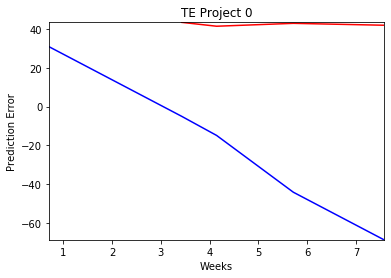

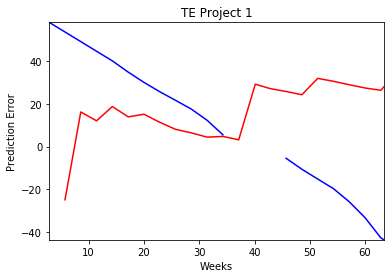

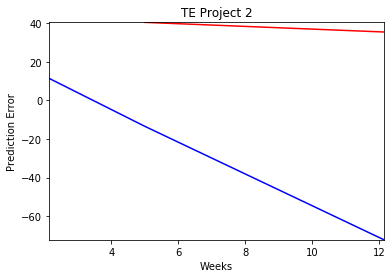

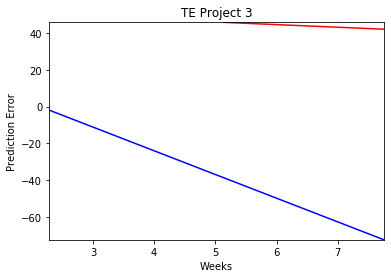

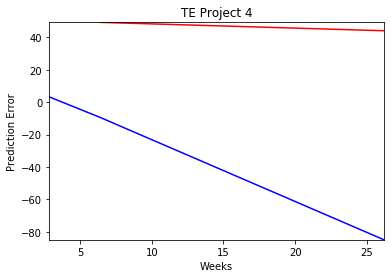

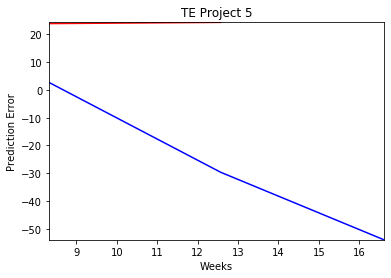

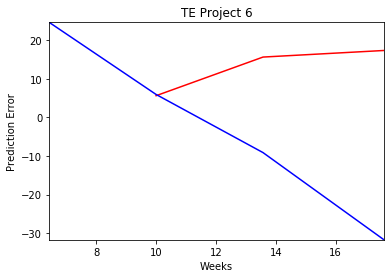

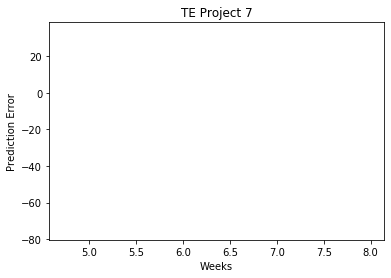

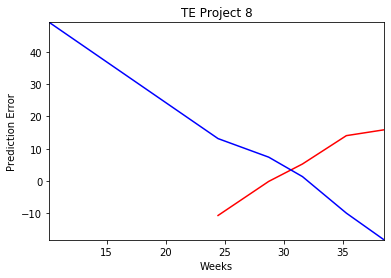

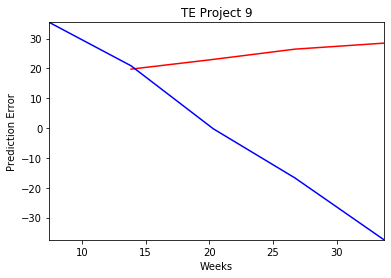

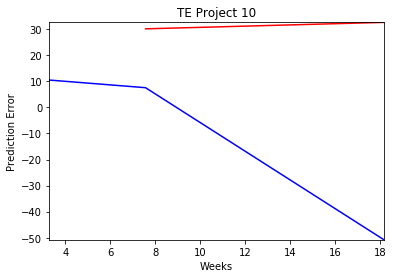

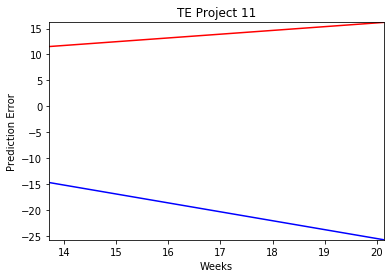

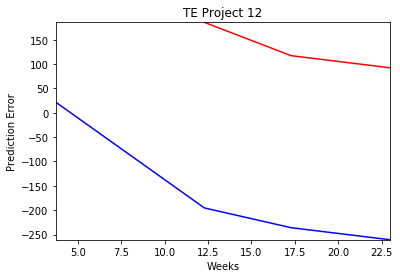

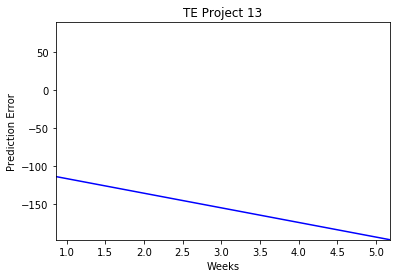

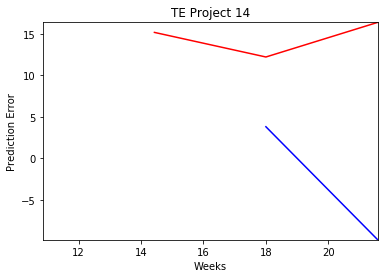

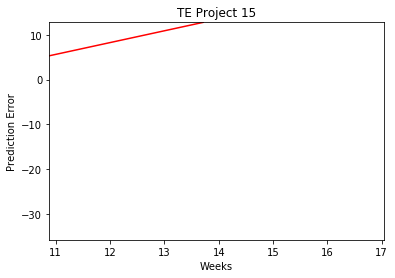

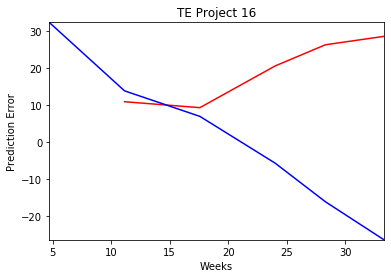

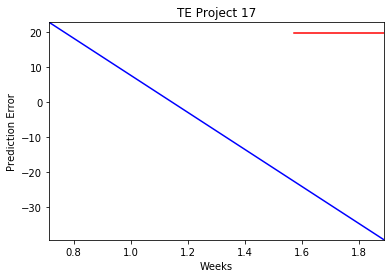

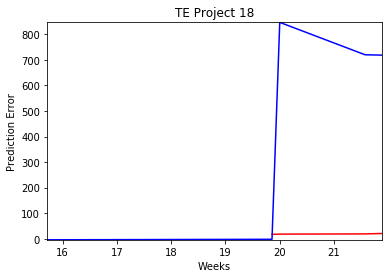

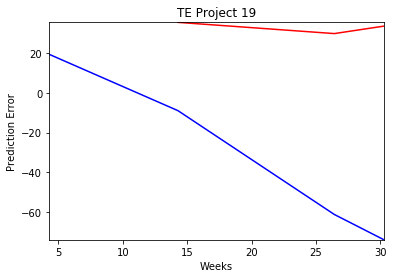

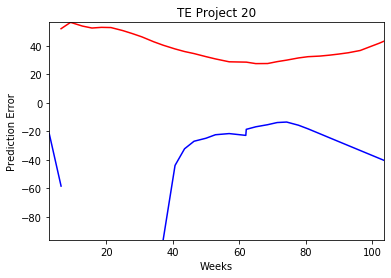

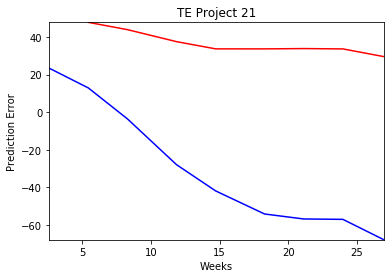

In [67]:
Te = []
for i in range(0, np.size(files)):
    Tex = []
    for j in range(0, np.size(ATNs[i])):
        m = (t_e[i][j]-t_e[i][0])/(ATNs[i][j]-ATNs[i][0]);
        a = t_e[i][j]-m*ATNs[i][j];
        Tez = (1.0-a)/m
        Tex.append(Tez)
    Te.append(Tex)

TEe = [[(DAC[i]-Te[i][t]*PD[i])/DAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]

Te1 = [[ATNs[i][t]-1/gammae[i][t]*np.log(-np.log(1.0/alphae[i][t])) for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]

TEe1 = [[(DAC[i]-Te1[i][t]*PD[i])/DAC[i]*100 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]

for i in range(0, np.size(files)):
    # plot gompertz
    plt.plot(t_x[i], TEe[i], 'r-', t_x[i], TEe1[i], 'b-')
    plt.title(f'TE Project {i}')
    plt.xlabel('Weeks')
    plt.ylabel('Prediction Error')
    plt.autoscale(tight='both')
    plt.show()

    